In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib import pyplot as plt



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/acm-bpdcs-kaggle-konquest-2024/sample_submission.csv
/kaggle/input/acm-bpdcs-kaggle-konquest-2024/train.csv
/kaggle/input/acm-bpdcs-kaggle-konquest-2024/test.csv


# Data Analysis

In [2]:
train_data = pd.read_csv('/kaggle/input/acm-bpdcs-kaggle-konquest-2024/train.csv')
train_data.head()


,id,CustomerGender,CustomerType,Age,TravelPurpose,ClassTravelled,DistanceToDestination,Inflight wifi,Time convenience,WebsiteExperience,...,Inflight entertainment system,On-board service,Leg room in flight,Baggage handling ease,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,CustomerHappiness
0,70172,Male,Frequent,13,Recreation,PremiumEconomy,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,Unhappy
1,5047,Male,Occasional,25,Business,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,Unhappy
2,110028,Female,Frequent,26,Business,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,Happy
3,24026,Female,Frequent,25,Business,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,Unhappy
4,119299,Male,Frequent,61,Business,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,Happy


In [3]:
train_data.columns

Index(['id', 'CustomerGender', 'CustomerType', 'Age', 'TravelPurpose',
       'ClassTravelled', 'DistanceToDestination', 'Inflight wifi',
       'Time convenience', 'WebsiteExperience', 'ConvenienceOfGate',
       'Inflight Food', 'Online check-in', 'ComfortOfSeats',
       'Inflight entertainment system', 'On-board service',
       'Leg room in flight', 'Baggage handling ease', 'Checkin service',
       'Inflight service', 'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'CustomerHappiness'],
      dtype='object')

In [4]:
train_data.dtypes

id                                 int64
CustomerGender                    object
CustomerType                      object
Age                                int64
TravelPurpose                     object
ClassTravelled                    object
DistanceToDestination              int64
Inflight wifi                      int64
Time convenience                   int64
WebsiteExperience                  int64
ConvenienceOfGate                  int64
Inflight Food                      int64
Online check-in                    int64
ComfortOfSeats                     int64
Inflight entertainment system      int64
On-board service                   int64
Leg room in flight                 int64
Baggage handling ease              int64
Checkin service                    int64
Inflight service                   int64
Cleanliness                        int64
Departure Delay in Minutes         int64
Arrival Delay in Minutes         float64
CustomerHappiness                 object
dtype: object

In [5]:
train_data.shape

(103904, 24)

In [6]:
# Viewing all the unique values of the object datatypes

print(train_data['CustomerGender'].unique(),
      train_data['CustomerType'].unique(),
      train_data['TravelPurpose'].unique(),
      train_data['ClassTravelled'].unique(),
      train_data['CustomerHappiness'].unique())



['Male' 'Female'] ['Frequent' 'Occasional'] ['Recreation' 'Business'] ['PremiumEconomy' 'Business' 'Economy'] ['Unhappy' 'Happy']


In [7]:
def unique_values_df(df):
    for col in df.columns:
        if df[col].dtype=='object':
            print(f'{col} = {df[col].unique()}')

In [8]:
unique_values_df(train_data)

CustomerGender = ['Male' 'Female']
CustomerType = ['Frequent' 'Occasional']
TravelPurpose = ['Recreation' 'Business']
ClassTravelled = ['PremiumEconomy' 'Business' 'Economy']
CustomerHappiness = ['Unhappy' 'Happy']


In [9]:
for col in train_data.columns:
    print(f'{col}; null values = {train_data[col].isnull().sum()}')

id; null values = 0
CustomerGender; null values = 0
CustomerType; null values = 0
Age; null values = 0
TravelPurpose; null values = 0
ClassTravelled; null values = 0
DistanceToDestination; null values = 0
Inflight wifi; null values = 0
Time convenience; null values = 0
WebsiteExperience; null values = 0
ConvenienceOfGate; null values = 0
Inflight Food; null values = 0
Online check-in; null values = 0
ComfortOfSeats; null values = 0
Inflight entertainment system; null values = 0
On-board service; null values = 0
Leg room in flight; null values = 0
Baggage handling ease; null values = 0
Checkin service; null values = 0
Inflight service; null values = 0
Cleanliness; null values = 0
Departure Delay in Minutes; null values = 0
Arrival Delay in Minutes; null values = 310
CustomerHappiness; null values = 0


In [10]:
# ensuring that no null values are missed in the huge list :skull:
for col in train_data.columns:
    null_count = train_data[col].isnull().sum()
    
    if null_count > 0:
        print(f'{col}; null values = {train_data[col].isnull().sum()}')

Arrival Delay in Minutes; null values = 310


In [11]:
# assuming null in delay as 0, possible place to optimse a tiny bit

In [12]:
#train_data['Arrival Delay in Minutes'] = train_data['Arrival Delay in Minutes'].fillna(0)
train_data.dropna(subset=['Arrival Delay in Minutes'], inplace=True)

for col in train_data.columns:
    null_count = train_data[col].isnull().sum()
    
    if null_count > 0:
        print(f'{col}; null values = {train_data[col].isnull().sum()}')
print('==================')        
for col in train_data.columns:
    print(f'{col}; null values = {train_data[col].isnull().sum()}')
        

id; null values = 0
CustomerGender; null values = 0
CustomerType; null values = 0
Age; null values = 0
TravelPurpose; null values = 0
ClassTravelled; null values = 0
DistanceToDestination; null values = 0
Inflight wifi; null values = 0
Time convenience; null values = 0
WebsiteExperience; null values = 0
ConvenienceOfGate; null values = 0
Inflight Food; null values = 0
Online check-in; null values = 0
ComfortOfSeats; null values = 0
Inflight entertainment system; null values = 0
On-board service; null values = 0
Leg room in flight; null values = 0
Baggage handling ease; null values = 0
Checkin service; null values = 0
Inflight service; null values = 0
Cleanliness; null values = 0
Departure Delay in Minutes; null values = 0
Arrival Delay in Minutes; null values = 0
CustomerHappiness; null values = 0


In [13]:
# no value provided by the id,drop it

train_data.drop('id', axis='columns',inplace=True) # no value provided by the id


In [14]:
train_data.head()

,CustomerGender,CustomerType,Age,TravelPurpose,ClassTravelled,DistanceToDestination,Inflight wifi,Time convenience,WebsiteExperience,ConvenienceOfGate,...,Inflight entertainment system,On-board service,Leg room in flight,Baggage handling ease,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,CustomerHappiness
0,Male,Frequent,13,Recreation,PremiumEconomy,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,Unhappy
1,Male,Occasional,25,Business,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,Unhappy
2,Female,Frequent,26,Business,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,Happy
3,Female,Frequent,25,Business,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,Unhappy
4,Male,Frequent,61,Business,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,Happy


In [15]:
train_data.dtypes

CustomerGender                    object
CustomerType                      object
Age                                int64
TravelPurpose                     object
ClassTravelled                    object
DistanceToDestination              int64
Inflight wifi                      int64
Time convenience                   int64
WebsiteExperience                  int64
ConvenienceOfGate                  int64
Inflight Food                      int64
Online check-in                    int64
ComfortOfSeats                     int64
Inflight entertainment system      int64
On-board service                   int64
Leg room in flight                 int64
Baggage handling ease              int64
Checkin service                    int64
Inflight service                   int64
Cleanliness                        int64
Departure Delay in Minutes         int64
Arrival Delay in Minutes         float64
CustomerHappiness                 object
dtype: object

In [16]:
# label encoding, and one-hot encoding(for ClassTravelled)
'''
CustomerGender = ['Male' 'Female']
CustomerType = ['Frequent' 'Occasional']
TravelPurpose = ['Recreation' 'Business']
ClassTravelled = ['PremiumEconomy' 'Business' 'Economy']
CustomerHappiness = ['Unhappy' 'Happy']
'''

'''
CustomerGender = ['Male' 'Female'] -> [0,1]
CustomerType = ['Frequent' 'Occasional'] -> [0,1]
TravelPurpose = ['Recreation' 'Business'] -> [0,1]
ClassTravelled = ['PremiumEconomy' 'Business' 'Economy'] -> one-hot encoding
CustomerHappiness = ['Unhappy' 'Happy'] -> [0,1]
'''


train_data['CustomerGender'].replace({'Male':0, 'Female':1},inplace=True)
train_data['CustomerType'].replace({'Frequent':0, 'Occasional':1},inplace=True)
train_data['TravelPurpose'].replace({'Recreation':0, 'Business':1},inplace=True)
train_data['CustomerHappiness'].replace({'Unhappy':0, 'Happy':1},inplace=True)

train_data.head()

/tmp/ipykernel_33/3767078540.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['CustomerGender'].replace({'Male':0, 'Female':1},inplace=True)
/tmp/ipykernel_33/3767078540.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['CustomerGender'].replace({'Male':0, 'Female':1},in

,CustomerGender,CustomerType,Age,TravelPurpose,ClassTravelled,DistanceToDestination,Inflight wifi,Time convenience,WebsiteExperience,ConvenienceOfGate,...,Inflight entertainment system,On-board service,Leg room in flight,Baggage handling ease,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,CustomerHappiness
0,0,0,13,0,PremiumEconomy,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,1,25,1,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,0,26,1,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,0,25,1,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,0,61,1,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [17]:
train_data['Arrival Delay in Minutes'].unique()

array([1.800e+01, 6.000e+00, 0.000e+00, 9.000e+00, 2.300e+01, 8.000e+00,
       3.500e+01, 5.100e+01, 1.000e+01, 5.000e+00, 4.000e+00, 2.900e+01,
       4.400e+01, 2.800e+01, 1.200e+01, 1.200e+02, 2.400e+01, 1.000e+00,
       2.000e+01, 3.100e+01, 1.500e+01, 4.800e+01, 2.600e+01, 4.900e+01,
       2.000e+00, 3.700e+01, 5.000e+01, 3.000e+00, 1.900e+01, 7.200e+01,
       1.100e+01, 3.400e+01, 6.200e+01, 2.700e+01, 5.200e+01, 1.300e+01,
       8.200e+01, 3.000e+01, 1.600e+01, 7.000e+00, 1.220e+02, 1.790e+02,
       1.250e+02, 1.700e+01, 8.900e+01, 1.010e+02, 1.400e+01, 6.100e+01,
       3.200e+01, 3.300e+01, 4.100e+01, 1.910e+02, 1.380e+02, 5.300e+01,
       2.200e+01, 5.700e+01, 6.500e+01, 7.600e+01, 1.070e+02, 9.200e+01,
       1.640e+02, 2.100e+01, 4.000e+01, 5.500e+01, 1.850e+02, 6.300e+01,
       7.700e+01, 8.600e+01, 9.100e+01, 1.000e+02, 5.400e+01, 3.600e+01,
       7.000e+01, 1.390e+02, 6.700e+01, 1.630e+02, 1.280e+02, 1.800e+02,
       9.300e+01, 1.210e+02, 4.500e+01, 1.050e+02, 

In [18]:
unique_values_df(train_data)

ClassTravelled = ['PremiumEconomy' 'Business' 'Economy']


In [19]:
train_data = pd.get_dummies(data=train_data, columns=['ClassTravelled'])

In [20]:
unique_values_df(train_data)

In [21]:
train_data.dtypes

CustomerGender                     int64
CustomerType                       int64
Age                                int64
TravelPurpose                      int64
DistanceToDestination              int64
Inflight wifi                      int64
Time convenience                   int64
WebsiteExperience                  int64
ConvenienceOfGate                  int64
Inflight Food                      int64
Online check-in                    int64
ComfortOfSeats                     int64
Inflight entertainment system      int64
On-board service                   int64
Leg room in flight                 int64
Baggage handling ease              int64
Checkin service                    int64
Inflight service                   int64
Cleanliness                        int64
Departure Delay in Minutes         int64
Arrival Delay in Minutes         float64
CustomerHappiness                  int64
ClassTravelled_Business             bool
ClassTravelled_Economy              bool
ClassTravelled_P

In [22]:
dummy_columns = [col for col in train_data.columns if col.startswith('ClassTravelled_')]
train_data[dummy_columns] = train_data[dummy_columns].astype(int)

In [23]:
train_data.dtypes

CustomerGender                     int64
CustomerType                       int64
Age                                int64
TravelPurpose                      int64
DistanceToDestination              int64
Inflight wifi                      int64
Time convenience                   int64
WebsiteExperience                  int64
ConvenienceOfGate                  int64
Inflight Food                      int64
Online check-in                    int64
ComfortOfSeats                     int64
Inflight entertainment system      int64
On-board service                   int64
Leg room in flight                 int64
Baggage handling ease              int64
Checkin service                    int64
Inflight service                   int64
Cleanliness                        int64
Departure Delay in Minutes         int64
Arrival Delay in Minutes         float64
CustomerHappiness                  int64
ClassTravelled_Business            int64
ClassTravelled_Economy             int64
ClassTravelled_P

In [24]:
train_data.head()

,CustomerGender,CustomerType,Age,TravelPurpose,DistanceToDestination,Inflight wifi,Time convenience,WebsiteExperience,ConvenienceOfGate,Inflight Food,...,Baggage handling ease,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,CustomerHappiness,ClassTravelled_Business,ClassTravelled_Economy,ClassTravelled_PremiumEconomy
0,0,0,13,0,460,3,4,3,1,5,...,4,4,5,5,25,18.0,0,0,0,1
1,0,1,25,1,235,3,2,3,3,1,...,3,1,4,1,1,6.0,0,1,0,0
2,1,0,26,1,1142,2,2,2,2,5,...,4,4,4,5,0,0.0,1,1,0,0
3,1,0,25,1,562,2,5,5,5,2,...,3,1,4,2,11,9.0,0,1,0,0
4,0,0,61,1,214,3,3,3,3,4,...,4,3,3,3,0,0.0,1,1,0,0


In [25]:
# scaling the dataset

from sklearn.preprocessing import MinMaxScaler

In [26]:
for col in train_data.columns:
    print(f'{col} = {train_data[col].unique()} ')

CustomerGender = [0 1] 
CustomerType = [0 1] 
Age = [13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78] 
TravelPurpose = [0 1] 
DistanceToDestination = [ 460  235 1142 ...  974 1479  400] 
Inflight wifi = [3 2 4 1 5 0] 
Time convenience = [4 2 5 3 1 0] 
WebsiteExperience = [3 2 5 4 1 0] 
ConvenienceOfGate = [1 3 2 5 4 0] 
Inflight Food = [5 1 2 4 3 0] 
Online check-in = [3 5 2 1 4 0] 
ComfortOfSeats = [5 1 2 3 4 0] 
Inflight entertainment system = [5 1 2 3 4 0] 
On-board service = [4 1 2 3 5 0] 
Leg room in flight = [3 5 4 2 1 0] 
Baggage handling ease = [4 3 5 1 2] 
Checkin service = [4 1 3 5 2 0] 
Inflight service = [5 4 3 1 2 0] 
Cleanliness = [5 1 2 3 4 0] 
Departure Delay in Minutes = [  25    1    0   11    9    4   28   43   49    7   17   52   54   27
   18   19    3  109   23    8   14   10   51   39  

In [27]:
columns_not_in_range = []

for col in train_data.columns:
    
    if any((train_data[col] < 0) | (train_data[col] > 1)):
            columns_not_in_range.append(col)

In [28]:
print(columns_not_in_range)

['Age', 'DistanceToDestination', 'Inflight wifi', 'Time convenience', 'WebsiteExperience', 'ConvenienceOfGate', 'Inflight Food', 'Online check-in', 'ComfortOfSeats', 'Inflight entertainment system', 'On-board service', 'Leg room in flight', 'Baggage handling ease', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [29]:
scaler = MinMaxScaler()

train_data[columns_not_in_range] = scaler.fit_transform(train_data[columns_not_in_range])

In [30]:
train_data.head()

,CustomerGender,CustomerType,Age,TravelPurpose,DistanceToDestination,Inflight wifi,Time convenience,WebsiteExperience,ConvenienceOfGate,Inflight Food,...,Baggage handling ease,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,CustomerHappiness,ClassTravelled_Business,ClassTravelled_Economy,ClassTravelled_PremiumEconomy
0,0,0,0.076923,0,0.086632,0.6,0.8,0.6,0.2,1.0,...,0.75,0.8,1.0,1.0,0.015704,0.011364,0,0,0,1
1,0,1,0.230769,1,0.041195,0.6,0.4,0.6,0.6,0.2,...,0.50,0.2,0.8,0.2,0.000628,0.003788,0,1,0,0
2,1,0,0.243590,1,0.224354,0.4,0.4,0.4,0.4,1.0,...,0.75,0.8,0.8,1.0,0.000000,0.000000,1,1,0,0
3,1,0,0.230769,1,0.107229,0.4,1.0,1.0,1.0,0.4,...,0.50,0.2,0.8,0.4,0.006910,0.005682,0,1,0,0
4,0,0,0.692308,1,0.036955,0.6,0.6,0.6,0.6,0.8,...,0.75,0.6,0.6,0.6,0.000000,0.000000,1,1,0,0


In [31]:
train_data.corr()['CustomerHappiness']

CustomerGender                  -0.012356
CustomerType                    -0.187558
Age                              0.137040
TravelPurpose                    0.448995
DistanceToDestination            0.298915
Inflight wifi                    0.284163
Time convenience                -0.051718
WebsiteExperience                0.171507
ConvenienceOfGate                0.000449
Inflight Food                    0.209659
Online check-in                  0.503447
ComfortOfSeats                   0.349112
Inflight entertainment system    0.398203
On-board service                 0.322450
Leg room in flight               0.313182
Baggage handling ease            0.247819
Checkin service                  0.235914
Inflight service                 0.244852
Cleanliness                      0.305050
Departure Delay in Minutes      -0.050515
Arrival Delay in Minutes        -0.057582
CustomerHappiness                1.000000
ClassTravelled_Business          0.503944
ClassTravelled_Economy          -0

In [32]:
# dropping prem-economy, its redundant (if not in the 2, must be in the third)
dropped_cols = ['CustomerGender', 'Time convenience',
                'ConvenienceOfGate', 'Departure Delay in Minutes',
                'Arrival Delay in Minutes','ClassTravelled_PremiumEconomy']

train_data.drop(columns=dropped_cols, inplace=True)
train_data.shape

(103594, 19)

In [33]:
# outilers removal

In [34]:
train_data.describe()


,CustomerType,Age,TravelPurpose,DistanceToDestination,Inflight wifi,WebsiteExperience,Inflight Food,Online check-in,ComfortOfSeats,Inflight entertainment system,On-board service,Leg room in flight,Baggage handling ease,Checkin service,Inflight service,Cleanliness,CustomerHappiness,ClassTravelled_Business,ClassTravelled_Economy
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,0.182752,0.415134,0.689857,0.233911,0.545951,0.551397,0.640425,0.650099,0.687953,0.671668,0.676522,0.670280,0.657922,0.660865,0.728152,0.657279,0.433394,0.478145,0.449765
std,0.386465,0.193758,0.462554,0.201393,0.265573,0.279787,0.265880,0.269887,0.263779,0.266606,0.257657,0.263082,0.295263,0.253079,0.235121,0.262439,0.495546,0.499525,0.497472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.256410,0.000000,0.077342,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.500000,0.600000,0.600000,0.400000,0.000000,0.000000,0.000000
50%,0.000000,0.423077,1.000000,0.163772,0.600000,0.600000,0.600000,0.600000,0.800000,0.800000,0.800000,0.800000,0.750000,0.600000,0.800000,0.600000,0.000000,0.000000,0.000000
75%,0.000000,0.564103,1.000000,0.345719,0.800000,0.800000,0.800000,0.800000,1.000000,0.800000,0.800000,0.800000,1.000000,0.800000,1.000000,0.800000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

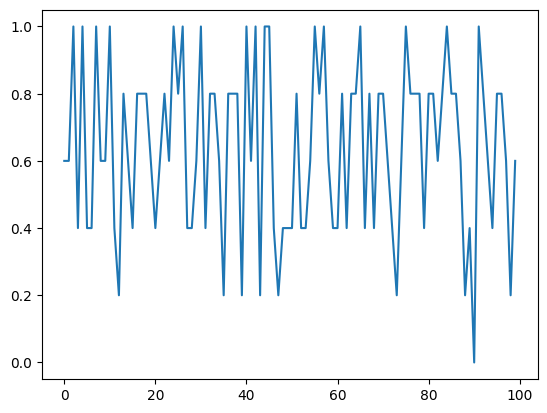

In [35]:
train_data['Online check-in'][:100].plot()

# Model

In [36]:
X = train_data.drop('CustomerHappiness',axis='columns')
y = train_data['CustomerHappiness']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5) # will preserve this random state for the state 5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.111, random_state=1) # 0.25 x 0.8 = 0.2

In [39]:
0.1 / 0.9

0.11111111111111112

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape

((82885, 18), (10360, 18), (82885,), (10360,), (10349, 18), (10349,))

In [121]:
X_train.head()

,CustomerType,Age,TravelPurpose,DistanceToDestination,Inflight wifi,WebsiteExperience,Inflight Food,Online check-in,ComfortOfSeats,Inflight entertainment system,On-board service,Leg room in flight,Baggage handling ease,Checkin service,Inflight service,Cleanliness,ClassTravelled_Business,ClassTravelled_Economy
59311,0,0.474359,0,0.087237,0.6,0.6,0.4,0.4,1.0,0.8,0.8,0.6,0.75,0.8,0.8,0.8,0,0
11836,0,0.410256,1,0.097738,0.4,0.8,0.4,0.4,0.4,0.4,0.4,0.8,0.75,0.4,0.2,0.4,0,1
5190,0,0.410256,1,0.129039,0.2,0.2,0.4,1.0,0.8,1.0,1.0,1.0,1.00,1.0,1.0,0.8,1,0
37804,0,0.641026,0,0.466680,0.6,0.6,0.6,0.6,0.8,0.6,0.4,0.2,0.25,0.4,0.4,0.6,0,1
79067,1,0.179487,1,0.210016,0.8,0.8,1.0,0.8,1.0,1.0,0.8,1.0,0.00,0.4,0.2,1.0,0,1


In [41]:
import tensorflow as tf

from tensorflow import keras
from keras import Sequential, layers
from keras.layers import Dense
from tensorflow.keras.regularizers import L2
from keras.callbacks import ModelCheckpoint, EarlyStopping

2024-11-06 20:17:10.453390: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-06 20:17:10.453575: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-06 20:17:10.601548: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Hyperparameter tuning

In [79]:
input_shape = X_train.shape[1]
input_shape

18

In [70]:
def build_model(hp):
    
    model = Sequential()
    model.add(layers.Dense(128, input_shape=(input_shape,), activation='relu', kernel_regularizer=L2(0.001)))
    model.add(layers.Dropout(0.05))
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=L2(0.001)))
    model.add(layers.Dropout(0.05))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=L2(0.001)))
    model.add(layers.Dropout(0.05))
    model.add(layers.Dense(32, activation='relu', kernel_regularizer=L2(0.001)))
    model.add(layers.Dropout(0.05))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    optimizer = hp.Choice('optimzer', values =  ['adam','sgd','rmsprop','adadelta'])
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])
    
    return model
    

In [75]:
tuner = kt.RandomSearch(build_model, objective='val_accuracy',max_trials=5)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
tuner.search(X_train,y_train,epochs=15,validation_data=(X_val,y_val))

Trial 4 Complete [00h 01m 48s]
val_accuracy: 0.9485979080200195

Best val_accuracy So Far: 0.9542449116706848
Total elapsed time: 00h 07m 33s


In [77]:
tuner.get_best_hyperparameters()[0].values

{'optimzer': 'adam'}

In [101]:
def build_model_nodes(hp):
    
    model=Sequential()
    
    units = hp.Int('units',min_value=128,max_value=192,step=8)
    
    model.add(Dense(units=units, activation='relu',input_dim=input_shape))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    return model

In [109]:
tuner_1= kt.RandomSearch(build_model_nodes,objective='val_accuracy',max_trials=7,directory='mydir_2')

In [110]:
tuner.search(X_train,y_train,epochs=12,validation_data=(X_val,y_val))

Trial 3 Complete [00h 01m 01s]
val_accuracy: 0.9508180618286133

Best val_accuracy So Far: 0.951155960559845
Total elapsed time: 00h 03m 00s

Search: Running Trial #4

Value             |Best Value So Far |Hyperparameter
144               |192               |units

Epoch 1/12
1943/1943 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8307 - loss: 0.3899 - val_accuracy: 0.9106 - val_loss: 0.2221
Epoch 2/12
1943/1943 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9212 - loss: 0.2000 - val_accuracy: 0.9311 - val_loss: 0.1744
Epoch 3/12
1943/1943 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9309 - loss: 0.1764 - val_accuracy: 0.9393 - val_loss: 0.1554
Epoch 4/12
1943/1943 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9370 - loss: 0.1591 - val_accuracy: 0.9417 - val_loss: 0.1467
Epoch 5/12
1943/1943 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9391 - loss: 0.1525 - val_accuracy: 0.9440 - val_loss: 0.1437
Epoch 6/12
1943/1943 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9415 - loss: 0.1

KeyboardInterrupt: 

In [ ]:
##############################################################

In [40]:



checkpoint = ModelCheckpoint("best_weights.keras", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



NameError: name 'model' is not defined

In [125]:
input_shape = X_train.shape[1]

model = keras.Sequential([
    keras.layers.Dense(128,input_shape=(input_shape,),activation='relu', kernel_regularizer=L2(0.001)),
    keras.layers.Dropout(0.05),
    
    keras.layers.Dense(128,activation='relu', kernel_regularizer=L2(0.001)),
    keras.layers.Dropout(0.05),
    
        
    keras.layers.Dense(64,activation='relu', kernel_regularizer=L2(0.001)),
    keras.layers.Dropout(0.05),
    
    keras.layers.Dense(32,activation='relu', kernel_regularizer=L2(0.001)),
    keras.layers.Dropout(0.05),
    
    keras.layers.Dense(1,activation='sigmoid'),
])

In [126]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 128)            │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,313 (114.50 KB)

 Trainable params: 29,313 (114.50 KB)

 Non-trainable params: 0 (0.00 B)

In [127]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)
# callbacks=[checkpoint, early_stopping]

Epoch 1/50
2591/2591 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8722 - loss: 0.4126 - val_accuracy: 0.9365 - val_loss: 0.2215
Epoch 2/50
2591/2591 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9333 - loss: 0.2201 - val_accuracy: 0.9424 - val_loss: 0.1920
Epoch 3/50
2591/2591 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9348 - loss: 0.2002 - val_accuracy: 0.9470 - val_loss: 0.1754
Epoch 4/50
2591/2591 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9384 - loss: 0.1910 - val_accuracy: 0.9490 - val_loss: 0.1655
Epoch 5/50
2591/2591 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9398 - loss: 0.1829 - val_accuracy: 0.9489 - val_loss: 0.1626
Epoch 6/50
2591/2591 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9395 - loss: 0.1793 - val_accuracy: 0.9521 - val_loss: 0.1646
Epoch 7/50
2591/2591 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9434 - loss: 0.1752 - val_accuracy: 0.9533 - val_loss: 0.1565
Epoch 8/50
2591/2591 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9444 - loss: 0

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt


# Plotting training, validation, and test loss
plt.figure(figsize=(15, 5))

# Plotting training and validation loss
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()



test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss[0]}, Test Accuracy: {test_loss[1]}')

# Plotting test loss
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.axhline(y=test_loss[0], color='r', linestyle='--', label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting all losses together
plt.subplot(1, 3, 3)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss[0], color='r', linestyle='--', label='Test Loss')
plt.title('All Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
'''
95.85
95.94
'''

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
y_pred_actual =[]

for pred in y_pred:
    if pred > 0.5:
        y_pred_actual.append(1)
    else:
        y_pred_actual.append(0) 

In [ ]:
y_pred_actual[:5]

In [ ]:
y_test[:5]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
'''
  precision    recall  f1-score   support

           0       0.96      0.97      0.96     11778
           1       0.96      0.94      0.95      9003




'''

In [ ]:
print(classification_report(y_test,y_pred_actual))

In [ ]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_actual)

plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Random Forest

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape,X_test.shape

((82875, 18), (20719, 18))

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.961581157391766
Confusion Matrix:
 [[11577   230]
 [  566  8346]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     11807
           1       0.97      0.94      0.95      8912

    accuracy                           0.96     20719
   macro avg       0.96      0.96      0.96     20719
weighted avg       0.96      0.96      0.96     20719



# Testing the test.csv file

In [ ]:
test_df = pd.read_csv('/kaggle/input/acm-bpdcs-kaggle-konquest-2024/test.csv')
test_df.head()

In [ ]:
test_df.shape

In [ ]:
# preprocess the test data 

In [ ]:
for col in test_df.columns:
    print(f'{col}; null values = {test_df[col].isnull().sum()}')

In [ ]:
# test_df['Arrival Delay in Minutes'] = test_df['Arrival Delay in Minutes'].fillna(0)
train_data.dropna(subset=['Arrival Delay in Minutes'], inplace=True)

In [ ]:
for col in test_df.columns:
    print(f'{col}; null values = {test_df[col].isnull().sum()}')

In [ ]:
test_df.drop('id', axis='columns',inplace=True)

In [ ]:
test_df['CustomerGender'].replace({'Male':0, 'Female':1},inplace=True)
test_df['CustomerType'].replace({'Frequent':0, 'Occasional':1},inplace=True)
test_df['TravelPurpose'].replace({'Recreation':0, 'Business':1},inplace=True)


In [ ]:
test_df = pd.get_dummies(data=test_df, columns=['ClassTravelled'])
test_df.dtypes

In [ ]:
test_df.head()

In [ ]:
dummy_columns = [col for col in test_df.columns if col.startswith('ClassTravelled_')]
test_df[dummy_columns] = test_df[dummy_columns].astype(int)
    
    
    

In [ ]:
test_df.dtypes

In [ ]:
columns_not_in_range = []

for col in test_df.columns:
    
    if any((test_df[col] < 0) | (test_df[col] > 1)):
            columns_not_in_range.append(col)

In [ ]:
test_df[columns_not_in_range] = scaler.fit_transform(test_df[columns_not_in_range])

In [ ]:
test_df.head()

In [ ]:
y_test_pred = model.predict(test_df)
y_test_pred[:10]

In [ ]:
y_test_pred_actual =[]

for pred in y_test_pred:
    if pred > 0.5:
        y_test_pred_actual.append("Happy") 
    else:
        y_test_pred_actual.append("Unhappy")
    

In [ ]:
y_test_pred_actual[:10]

In [ ]:
id_df = pd.read_csv('/kaggle/input/acm-bpdcs-kaggle-konquest-2024/test.csv')
data = {'id': id_df['id'], 'CustomerHappiness': y_test_pred_actual}
result_df = pd.DataFrame(data)
result_df.head()

In [ ]:
result_df.to_csv('output_file.csv', index=False)
